# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_dataset = tf.data.TextLineDataset('data/sign_mnist_train.csv').skip(1)
test_dataset = tf.data.TextLineDataset('data/sign_mnist_test.csv').skip(1)

In [13]:
def parse_csv(line):
    split_line = tf.strings.split(line, ',')
    split_line = tf.strings.to_number(split_line)
    label = tf.reshape(split_line[0], [1])
    pixels = tf.reshape(split_line[1:], [32, 32])
    
    return (pixels, label)

def preprocess(dataset, is_training_split=True, batch_size=16):
    dataset = dataset.map(parse_csv)
    
    splits = []
    if not is_training_split:
        leng = sum([1 for _ in dataset])
        split_leng = leng // 2
        valid_set = dataset.take(split_leng)
        test_set = dataset.skip(split_leng)
        splits.extend([valid_set, test_set])
    else:
        splits.append(dataset)
        
    processed_splits = []
    for split in splits:
        processed_split = split.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        processed_splits.append(processed_split)
    
    return processed_splits

In [14]:
[train_dataset] = preprocess(train_dataset)
[valid_dataset, test_dataset] = preprocess(test_dataset, is_training_split=False)

/tmp/ipykernel_28071/2170260974.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Label: {int(labels[j].numpy())}")
2024-08-10 21:13:47.371724: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


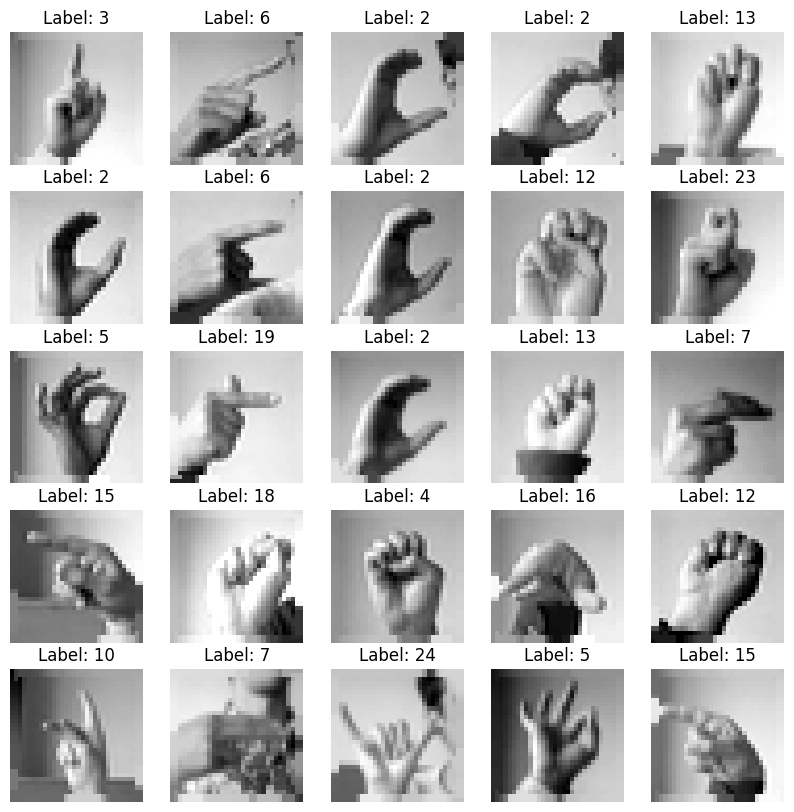

In [8]:
def display_sample_images(dataset, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(num_samples)):
        for j in range(num_samples):
            ax = plt.subplot(num_samples, num_samples, i * num_samples + j + 1)
            plt.imshow(images[j].numpy(), cmap='gray')
            plt.title(f"Label: {int(labels[j].numpy())}")
            plt.axis('off')
    plt.show()

display_sample_images(train_dataset)